In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn as sk
import math as m

In [ ]:
from google.colab import drive
drive.mount('/gdrive')

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


In [ ]:
path = '/gdrive/My Drive/ML:Pilot/Assignments/Data/'
rdata = pd.read_csv(path + 'Iris.csv')
rdata.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
y = rdata['Species']
y = np.array(y)
y.reshape(-1,1)

array([['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-se

In [ ]:
x = rdata.drop(columns = ['Species'])
x.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,1,5.1,3.5,1.4,0.2
1,2,4.9,3.0,1.4,0.2
2,3,4.7,3.2,1.3,0.2
3,4,4.6,3.1,1.5,0.2
4,5,5.0,3.6,1.4,0.2


In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, shuffle = True)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((120, 5), (120,), (30, 5), (30,))

In [ ]:
from sklearn.linear_model import LogisticRegression
parameters = {'solver': ('newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'), 'C':[0.00001,1]}
model = LogisticRegression(penalty = 'l2',n_jobs= -2, max_iter= 100000)
Grid = GridSearchCV(model,parameters)
Grid.fit(x_train,y_train)


GridSearchCV(cv=None, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100000, multi_class='auto',
                                          n_jobs=-2, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [1e-05, 1],
                         'solver': ('newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga')},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [ ]:
train_pred = Grid.predict(x_train)

from sklearn.metrics import confusion_matrix
m = confusion_matrix(y_train, train_pred)
print(m)

[[38  0  0]
 [ 0 42  0]
 [ 0  0 40]]


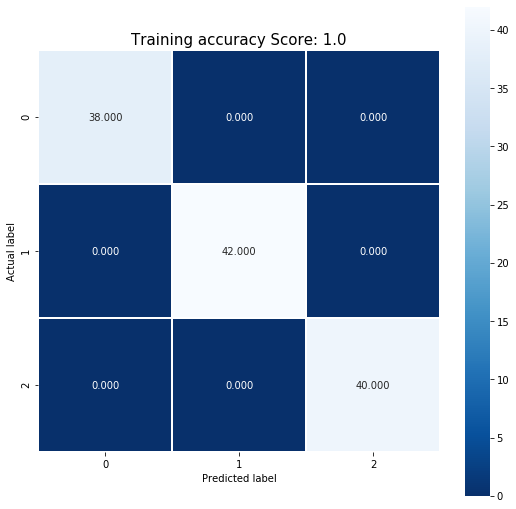

In [ ]:
import seaborn as sns
plt.figure(figsize=(9,9))
sns.heatmap(m, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Training accuracy Score: {0}'.format(TrainScore)
plt.title(all_sample_title, size = 15);

In [ ]:
TrainScore = Grid.score(x_train,y_train)
print(TrainScore)

1.0


In [ ]:
#Test Data
pred_y = Grid.predict(x_test)

from sklearn.metrics import confusion_matrix
m = confusion_matrix(y_test, pred_y)
print(m)

[[12  0  0]
 [ 0  8  0]
 [ 0  0 10]]


In [ ]:
TestScore = Grid.score(x_test,y_test)
print(TestScore)

1.0


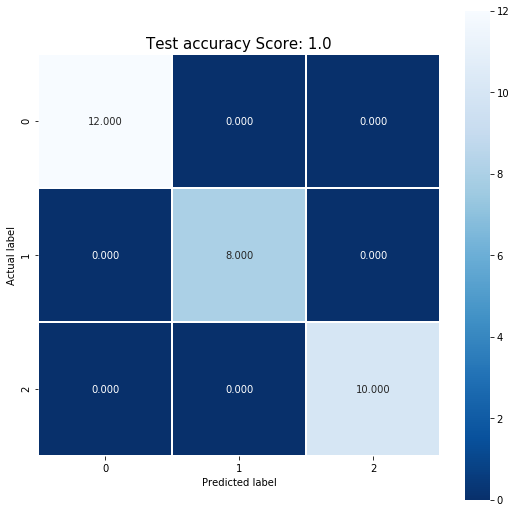

In [ ]:
import seaborn as sns
plt.figure(figsize=(9,9))
sns.heatmap(m, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Test accuracy Score: {0}'.format(TestScore)
plt.title(all_sample_title, size = 15);

In [ ]:
Grid.get_params

<bound method BaseEstimator.get_params of GridSearchCV(cv=None, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100000, multi_class='auto',
                                          n_jobs=-2, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [1e-05, 1],
                         'solver': ('newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga')},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)>